# Loan Approval Prediction using Python

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Read the Dataset

In [60]:

df = pd.read_csv('E:\MCA\MCA Sem 2\ML PROJECTS\Project 2\covid data prediction\chatbot\LoanApprovalPrediction/archive/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.shape

(614, 13)

In [62]:
#  I'll drop the loan id column and move further:
df = df.drop('Loan_ID', axis=1)

In [63]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
#Let's have a look if the data has missing values or not:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
# The data has missing values in some of the categorical columns and some numerical columns. Let’s have a look at the descriptive statistics of the dataset before filling in the missing values:

In [66]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
# In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data:

In [68]:
# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# 1.We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data;

<Axes: >

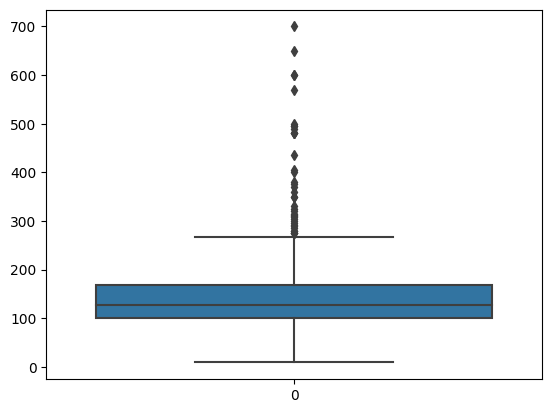

In [69]:
# Visualizing Outliners Using Box Plot
import seaborn as sns
sns.boxplot(df['LoanAmount'])

In [70]:
# Fill misiing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# 2.We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use;

In [71]:
# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True) 

# 3.We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.

In [72]:
# Filling missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [73]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratoray Data Analysis

In [74]:
# Now let's have a look at the distribution of the laon  status column:

In [75]:
loan_status_count = df['Loan_Status'].value_counts()

In [76]:
loan_status_count

Loan_Status
Y    422
N    192
Name: count, dtype: int64

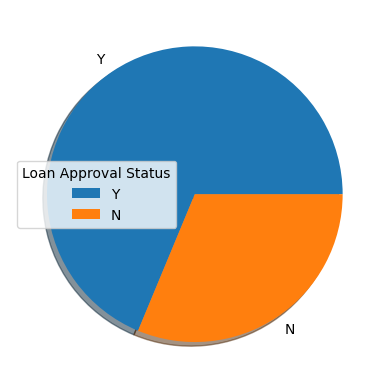

In [77]:
plt.pie(loan_status_count, shadow=True, labels=loan_status_count.index)
plt.legend(title='Loan Approval Status')

In [78]:
# Now let's have a look at the distribution of the gender column: 

In [79]:
gender_count = df['Gender'].value_counts()

In [80]:
gender_count

Gender
Male      502
Female    112
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

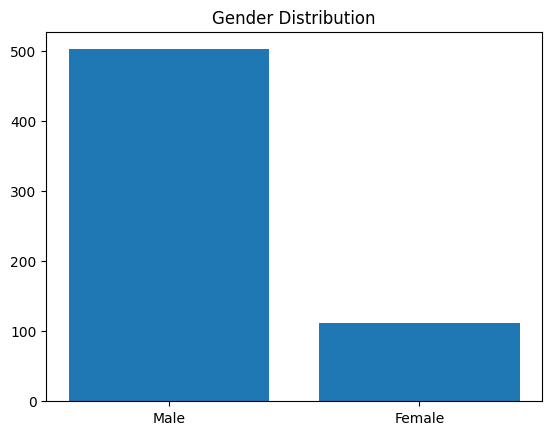

In [81]:
plt.bar(gender_count.index, gender_count.values, align = 'center')
plt.title('Gender Distribution')

In [82]:
# Now let's have a look at the distribution of the marital status column:

In [83]:
married_count = df['Married'].value_counts()

In [84]:
married_count

Married
Yes    401
No     213
Name: count, dtype: int64

Text(0.5, 1.0, 'Marital Status Distribution')

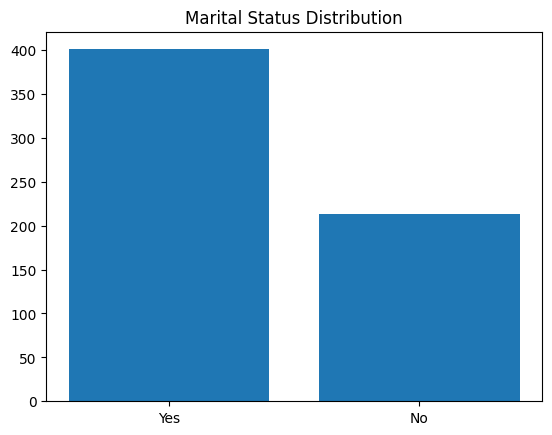

In [85]:
plt.bar(married_count.index, married_count.values, align='center')
plt.title('Marital Status Distribution')

In [86]:
# Now let's have a look at the distribution of the education column:

In [87]:
education_count = df['Education'].value_counts()

In [88]:
education_count

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Text(0.5, 1.0, 'Education Distribution')

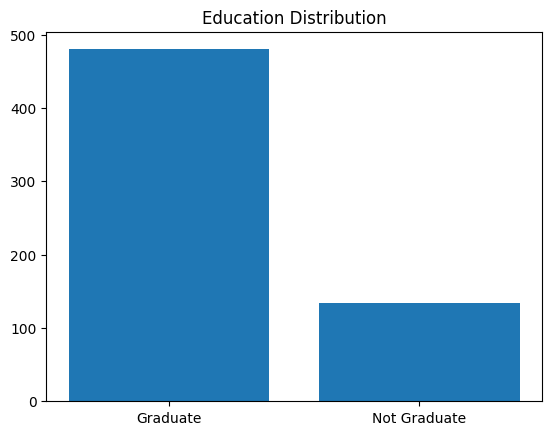

In [89]:
plt.bar(education_count.index, education_count.values, align= 'center')
plt.title('Education Distribution')

In [90]:
# Now lets have a look at the distribution of the self-employment column:

In [91]:
self_employment_count = df['Self_Employed'].value_counts()

In [92]:
self_employment_count

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Text(0.5, 1.0, 'Self Employment Distribution')

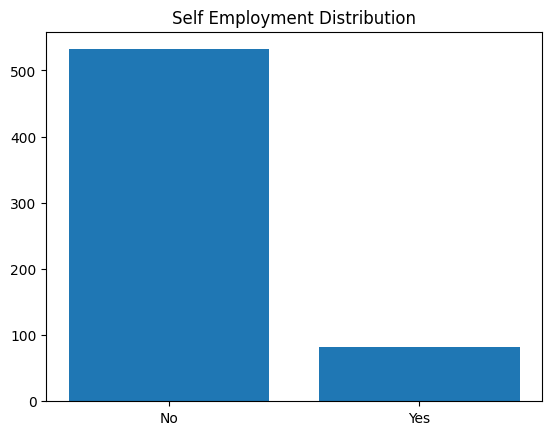

In [93]:
plt.bar(self_employment_count.index, self_employment_count.values, align= 'center')
plt.title('Self Employment Distribution')

In [94]:
# Now let's have a look at the distribution of the Applicant Income column:

<Axes: xlabel='ApplicantIncome'>

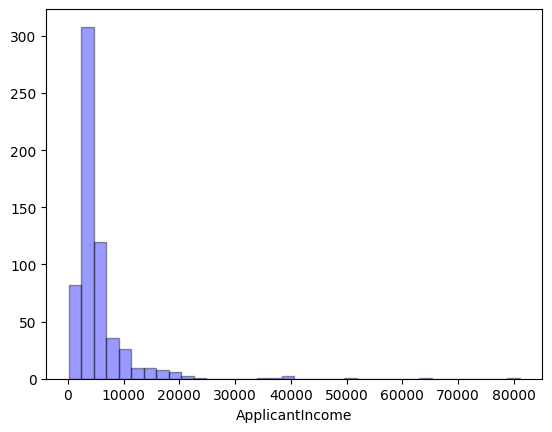

In [95]:
sns.distplot(df['ApplicantIncome'], hist=True, kde=False,
            bins= int(180/5), color='blue',
            hist_kws = {'edgecolor':'black'})

In [96]:
#Now let’s have a look at the relationship between the income of the loan applicant and the loan status:


Text(0.5, 1.0, 'Loan_Status vs ApplicantIncome')

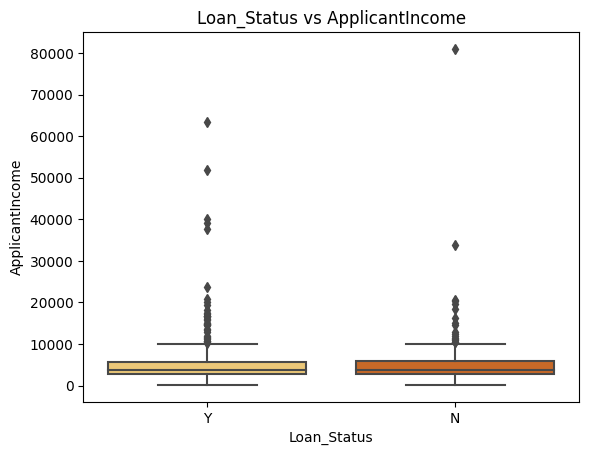

In [97]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="YlOrBr")
plt.title('Loan_Status vs ApplicantIncome')

# • The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [98]:
# Claculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound ) & ( df['ApplicantIncome'] <= upper_bound )] 

Text(0.5, 1.0, 'Loan_Status vs CoapplicantIncome')

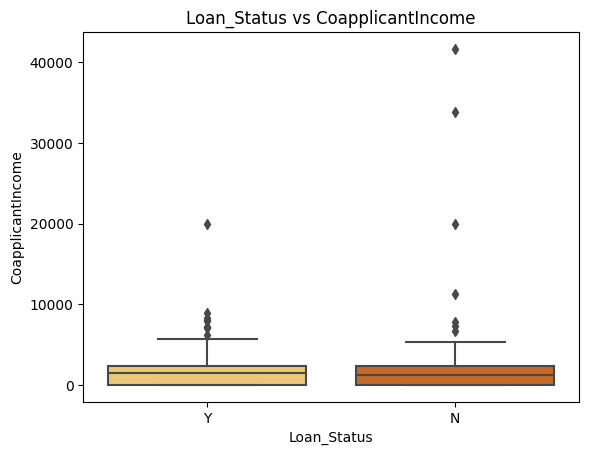

In [99]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data = df, palette = "YlOrBr")
plt.title('Loan_Status vs CoapplicantIncome')

# The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:


In [100]:
# Calculate the IQR

Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers

df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

In [101]:
#The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:


Text(0.5, 1.0, 'Loan_Status vs CoapplicantIncome')

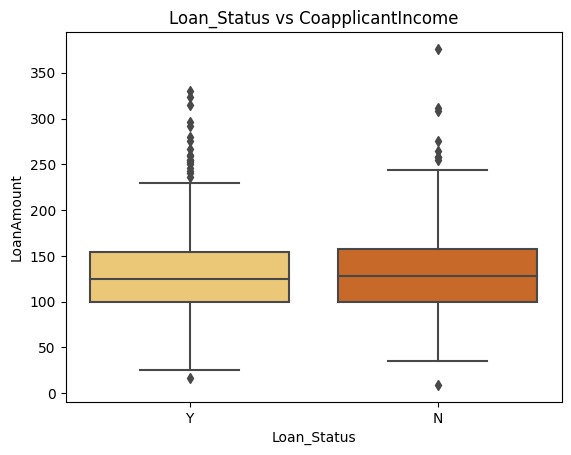

In [102]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data= df, palette="YlOrBr")
plt.title('Loan_Status vs CoapplicantIncome')

In [103]:
#Now let’s have a look at the relationship between credit history and loan status:


In [105]:
import plotly.express as px

In [108]:
fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status', barmode= 'group', title='Loan_Status vs Credit_History')
fig_credit_history.show()

In [109]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', barmode='group', title='Loan_Status vs Property_Area')
fig_property_area.show()

# 0.2 Data Preparation and Training Loan Approval Prediction Model
# In this step, we will:
# 1) convert categorical columns into numerical ones;
# 2) split the data into training and test sets;
# 3) scale the numerical features;
# 4) train the loan approval prediction model.

In [111]:
# Convert catagorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns = cat_cols)

In [112]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [114]:
# Split the data into tarning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Scale the numerical columns using StanderedScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [118]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Now let's make prediction on the test set:

In [119]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [123]:
# Convert C_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the prediction values to X_test_df

X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term   
277        -0.544528          -0.037922   -0.983772          0.305159  \
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes   
277        0.402248          False         True       False         True  \
84         0.402248          False         True       False         True   
275        0.402248          False         True       False         True   
392        0.402248          False         True       False         True   
537        0.402248          False         True        True        False   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate   
277          True  ...       

# So this is how we can train a Machine Learning model to predict loan approval using Python.